<a href="https://colab.research.google.com/github/junekimdev/kdt-autodrive4-team3-week11-12/blob/dahyunk_week11/check_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import shutil

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/라벨링

/content/drive/MyDrive/라벨링


In [4]:
cd video22_img_anno

/content/drive/MyDrive/라벨링/video22_img_anno


In [5]:
red = os.listdir("빨간불")
green = os.listdir("초록불")
red.sort()
green.sort()

In [6]:
yellow = os.listdir("노란불")
yellow.sort()

In [ ]:
def make_output_dir(category):
    os.makedirs(f'{category}/Annotations')
    os.makedirs(f'{category}/Images')

In [ ]:
make_output_dir("빨간불")
make_output_dir("초록불")

In [ ]:
ls

video20_0.png   video20_1.txt  video20_4.png  video20_6.txt  video20_9.png
video20_0.txt   video20_2.png  video20_4.txt  video20_7.png  video20_9.txt
video20_10.png  video20_2.txt  video20_5.png  video20_7.txt
video20_10.txt  video20_3.png  video20_5.txt  video20_8.png
video20_1.png   video20_3.txt  video20_6.png  video20_8.txt


In [ ]:
make_output_dir("노란불")

In [ ]:
cd ..

/content/drive/MyDrive/라벨링/video22_img_anno


In [ ]:
rm -r Images/

In [ ]:
src1 = "빨간불/"
src2 = "초록불/"
src3 = "노란불/"

In [ ]:
def divide_img_anno(src, list_):
  for i in list_:
    if "txt" in i:
      shutil.move(src+i,  src+"Annotations/"+i)
    else:
      shutil.move(src+i, src+"Images/"+i)

In [ ]:
divide_img_anno(src1, red)
divide_img_anno(src2, green)

In [ ]:
divide_img_anno(src3, yellow)

In [7]:
red_images = os.listdir("빨간불/Images")
red_annots = os.listdir("빨간불/Annotations")
green_images = os.listdir("초록불/Images")
green_annots = os.listdir("초록불/Annotations")
yellow_images = os.listdir("노란불/Images")
yellow_annots = os.listdir("노란불/Annotations")
print(len(red_annots), len(red_images))
print(len(green_images), len(green_annots))

6 6
33 33


In [8]:
red_annots.sort()
red_images.sort()
green_annots.sort()
green_images.sort()
yellow_annots.sort()
yellow_images.sort()

In [ ]:
print(red_annots)
print(green_annots)

['video13_174.txt', 'video13_189.txt', 'video13_190.txt', 'video13_191.txt', 'video13_192.txt', 'video13_193.txt']
['video13_196.txt', 'video13_197.txt', 'video13_198.txt', 'video13_199.txt', 'video13_200.txt', 'video13_201.txt', 'video13_202.txt', 'video13_203.txt', 'video13_204.txt', 'video13_205.txt', 'video13_206.txt', 'video13_207.txt', 'video13_208.txt', 'video13_209.txt', 'video13_210.txt', 'video13_211.txt', 'video14_100.txt', 'video14_101.txt', 'video14_102.txt', 'video14_103.txt', 'video14_104.txt', 'video14_105.txt', 'video14_106.txt', 'video14_107.txt', 'video14_91.txt', 'video14_92.txt', 'video14_93.txt', 'video14_94.txt', 'video14_95.txt', 'video14_96.txt', 'video14_97.txt', 'video14_98.txt', 'video14_99.txt']


In [ ]:
print(yellow_annots)

['video20_0.txt', 'video20_1.txt', 'video20_10.txt', 'video20_2.txt', 'video20_3.txt', 'video20_4.txt', 'video20_5.txt', 'video20_6.txt', 'video20_7.txt', 'video20_8.txt', 'video20_9.txt']


In [9]:
def make_annots_list(path, list_):
  object_detector = []
  for li in list_:
    txt_file = open(path+li, "r")
    lines = txt_file.readlines()
    stack = []
    for line in lines:
      stack.append(list(map(float, line.split())))
    object_detector.append(stack)
    txt_file.close()
  return object_detector

In [10]:
red_detector = make_annots_list("빨간불/Annotations/", red_annots)
green_detector = make_annots_list("초록불/Annotations/", green_annots)


In [11]:
yellow_detector = make_annots_list("노란불/Annotations/", yellow_annots)

In [ ]:
print(red_detector)
print(green_detector)

[[[0.0, 0.297659, 0.478439, 0.107023, 0.184805], [1.0, 0.79097, 0.463039, 0.021182, 0.030801], [4.0, 0.965998, 0.404517, 0.061315, 0.172485]], [[0.0, 0.589186, 0.474333, 0.061315, 0.090349], [4.0, 0.871237, 0.410678, 0.092531, 0.2423]], [[4.0, 0.863991, 0.399384, 0.093645, 0.240246], [0.0, 0.568004, 0.476386, 0.063545, 0.102669]], [[0.0, 0.513935, 0.472279, 0.06689, 0.106776], [4.0, 0.818283, 0.395277, 0.098105, 0.240246]], [[4.0, 0.77369, 0.37885, 0.107023, 0.240246], [0.0, 0.462653, 0.471253, 0.06243, 0.096509]], [[0.0, 0.445373, 0.482546, 0.065775, 0.11499], [4.0, 0.765329, 0.37885, 0.117057, 0.252567]]]
[[[4.0, 0.811037, 0.364476, 0.132664, 0.281314], [0.0, 0.442029, 0.48768, 0.079153, 0.12115]], [[0.0, 0.436455, 0.502053, 0.088071, 0.13347], [4.0, 0.829989, 0.36653, 0.150502, 0.310062]], [[0.0, 0.427536, 0.497947, 0.090301, 0.141684], [4.0, 0.837793, 0.365503, 0.157191, 0.320329]], [[0.0, 0.414716, 0.479466, 0.095875, 0.137577], [4.0, 0.833891, 0.36345, 0.142698, 0.324435]], [[4.0

In [ ]:
print(yellow_detector)

[[[3.0, 0.596433, 0.498971, 0.051282, 0.080247], [5.0, 0.384615, 0.446502, 0.06689, 0.148148], [6.0, 0.481048, 0.490741, 0.021182, 0.034979]], [[5.0, 0.384615, 0.443416, 0.06689, 0.146091], [3.0, 0.599777, 0.498971, 0.046823, 0.080247], [6.0, 0.484392, 0.49177, 0.016722, 0.032922]], [[6.0, 0.520067, 0.492798, 0.025641, 0.034979], [5.0, 0.397436, 0.433128, 0.072464, 0.179012], [3.0, 0.656633, 0.5, 0.057971, 0.09465]], [[3.0, 0.607023, 0.5, 0.052397, 0.078189], [5.0, 0.388517, 0.445473, 0.068004, 0.162551], [6.0, 0.490524, 0.490741, 0.020067, 0.030864]], [[5.0, 0.386845, 0.441358, 0.071349, 0.166667], [3.0, 0.613712, 0.497942, 0.054627, 0.082305], [6.0, 0.494426, 0.492798, 0.016722, 0.030864]], [[3.0, 0.630992, 0.495885, 0.053512, 0.08642], [5.0, 0.397993, 0.438272, 0.075808, 0.17284], [6.0, 0.507804, 0.489712, 0.025641, 0.028807]], [[5.0, 0.400223, 0.434156, 0.069119, 0.164609], [3.0, 0.642698, 0.490741, 0.054627, 0.092593], [6.0, 0.512821, 0.488683, 0.024526, 0.039095]], [[6.0, 0.51728

In [58]:
def image_processing(img_path, detector):
  for i in detector:
    cls = int(i[0])
    if cls == 4:
      lower_blue = (110,100,100)
      upper_blue = (125, 255, 255)
      # lower_red = (0,10,10)
      # upper_red = (30,255,255)
      cx, cy, w, h = i[1], i[2], i[3], i[4]
      img = cv2.imread(img_path)
      roi_img = img[int((cy-h/2)*416):int((cy+h/2)*416),int((cx-w/4)*416):int((cx+w/4)*416)]
      print("roi_img")
      cv2_imshow(roi_img)

      new_img = cv2.cvtColor(roi_img, cv2.COLOR_BGR2HSV)
      print("new_img")
      cv2_imshow(new_img)
      
      ## hsv -> hsv
      hsv_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2HSV)

      mask  = cv2.inRange(hsv_img, lower_blue, upper_blue)

      mask_img = cv2.bitwise_and(new_img, new_img, mask = mask)
      print("mask_img")
      cv2_imshow(mask_img)
      # print(mask_img)
      gray_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
      # print(gray_img)
      ret ,th_img = cv2.threshold(gray_img, 1, 255, cv2.THRESH_BINARY_INV)
      cv2_imshow(th_img)
      row = int(h*416*0.3)
      col = len(th_img[0])
      sqare = len(th_img)*col
      count = 0
      print("roi1")
      cv2_imshow(th_img[0:row,0:col])
      print("roi2")
      cv2_imshow(th_img[int(0.65*h*416):int(0.65*h*416)+row, 0: col])
      for i in range(row):
        for j in range(col):
          if th_img[i][j] == 0:
            count += 1
          if th_img[i+int(0.65*h*416)][j] == 0:
            count +=1
      decision = count/sqare*100
      print(decision)




      #########허프 원 변환 ##############
      # circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1, 100, param1 = 250, param2 = 10, minRadius = 5, maxRadius = 30)
      # if circles is None:
        # print("Stop!")
        # break
      # circles = np.uint16(np.around(circles))
    ### 외접하는 정사각형 범위 ####
      # for i in circles[0,:]:
        # cx, cy, rect_l = i[0], i[1], i[2]
      # rect_x_min = cx-rect_l//2
      # rect_x_max = cx+rect_l//2
      # rect_y_min = cy-rect_l//2
      # rect_y_max = cy+rect_l//2
      
      # check_img=gray_img[rect_y_min:rect_y_max,rect_x_min:rect_x_max]
      # cv2_imshow(roi_img[rect_y_min:rect_y_max,rect_x_min:rect_x_max])
      # cv2_imshow(check_img)
      # num = int((rect_x_max - rect_x_min) * (rect_y_max - rect_y_min) * 0.9)
      # count = 0
      # bit = 0
    #   for i in range(len(check_img)):
    #     for j in range(len(check_img[0])):
    #       if check_img[i][j] == 0:
    #         count += 1
    #       if count > num:
    #         print("Stop!")
    #         bit = 1
    #         break
    #     if bit == 1:
    #       break
    #   if count <= num:
    #     print("Green")
    # else:
    #   continue

In [56]:
red_img_path = "빨간불/Images/"
for i, j in zip(red_images, red_detector):
  image_processing(red_img_path+i,j)

roi_img


new_img


mask_img


roi1


roi2


2.564102564102564
roi_img


new_img


mask_img


roi1


roi2


19.603960396039604
roi_img


new_img


mask_img


roi1


roi2


15.15
roi_img


new_img


mask_img


roi1


roi2


16.950000000000003
roi_img


new_img


mask_img


roi1


roi2


16.727272727272727
roi_img


new_img


mask_img


roi1


roi2


16.349206349206348


roi_img


new_img


mask_img


roi1


roi2


11.63003663003663
roi_img


new_img


mask_img


roi1


roi2


2.5756439109777443
roi_img


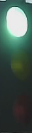

new_img


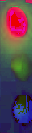

mask_img


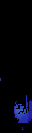

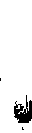

roi1


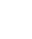

roi2


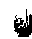

6.602443609022557
roi_img


new_img


mask_img


roi1


roi2


6.257982120051085
roi_img


new_img


mask_img


roi1


roi2


10.50153049211208
roi_img


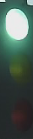

new_img


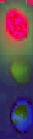

mask_img


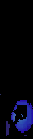

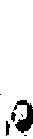

roi1


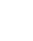

roi2


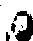

8.175277959450622
roi_img


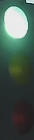

new_img


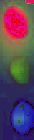

mask_img


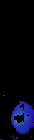

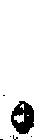

roi1


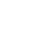

roi2


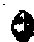

10.399159663865547
roi_img


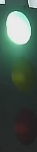

new_img


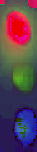

mask_img


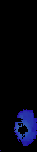

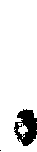

roi1


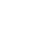

roi2


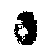

9.157183499288763
roi_img


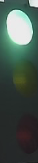

new_img


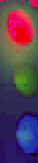

mask_img


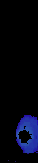

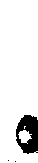

roi1


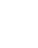

roi2


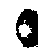

9.509202453987731
roi_img


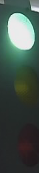

new_img


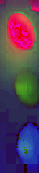

mask_img


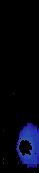

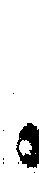

roi1


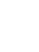

roi2


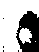

9.218912109085519
roi_img


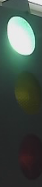

new_img


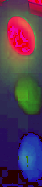

mask_img


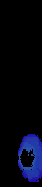

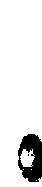

roi1


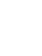

roi2


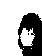

9.065444359562006
roi_img


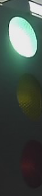

new_img


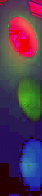

mask_img


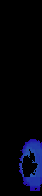

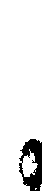

roi1


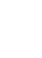

roi2


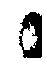

7.738095238095238
roi_img


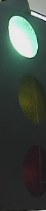

new_img


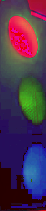

mask_img


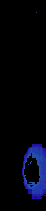

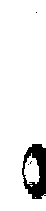

roi1


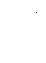

roi2


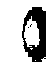

7.850813929528128
roi_img


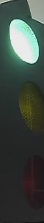

new_img


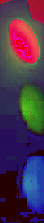

mask_img


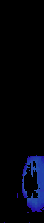

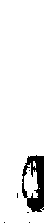

roi1


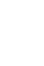

roi2


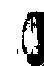

7.205462698736241
roi_img


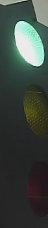

new_img


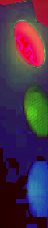

mask_img


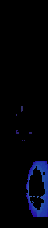

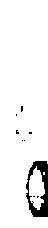

roi1


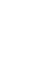

roi2


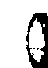

5.317982456140351
roi_img


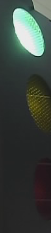

new_img


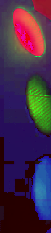

mask_img


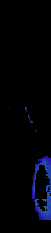

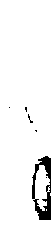

roi1


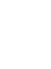

roi2


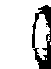

4.6116300597492215
roi_img


new_img


mask_img


roi1


roi2


5.136523384698568
roi_img


new_img


mask_img


roi1


roi2


6.957746478873239
roi_img


new_img


mask_img


roi1


roi2


8.577040593627236
roi_img


new_img


mask_img


roi1


roi2


9.221556886227544
roi_img


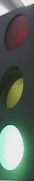

new_img


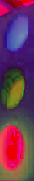

mask_img


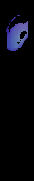

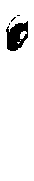

roi1


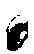

roi2


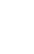

7.231069223269418
roi_img


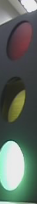

new_img


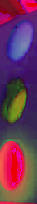

mask_img


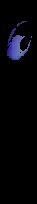

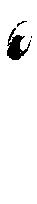

roi1


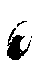

roi2


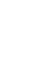

4.968203497615263
roi_img


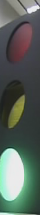

new_img


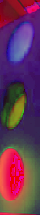

mask_img


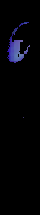

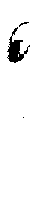

roi1


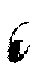

roi2


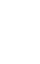

3.8372093023255816
roi_img


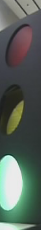

new_img


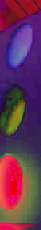

mask_img


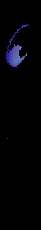

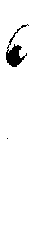

roi1


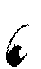

roi2


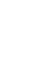

3.340402969247084
roi_img


new_img


mask_img


roi1


roi2


26.180069930069934
roi_img


new_img


mask_img


roi1


roi2


25.91476538958244
roi_img


new_img


mask_img


roi1


roi2


25.44757033248082
roi_img


new_img


mask_img


roi1


roi2


21.861471861471863
roi_img


new_img


mask_img


roi1


roi2


10.75487012987013
roi_img


new_img


mask_img


roi1


roi2


9.011857707509881
roi_img


new_img


mask_img


roi1


roi2


3.2520325203252036
roi_img


new_img


mask_img


roi1


roi2


5.4790026246719155
roi_img


new_img


mask_img


roi1


roi2


6.337448559670782


In [59]:
green_img_path = "초록불/Images/"
for i, j in zip(green_images, green_detector):
  image_processing(green_img_path+i,j)

roi_img


new_img


mask_img


0.0
roi_img


new_img


mask_img


0.0
roi_img


new_img


mask_img


0.0
roi_img


new_img


mask_img


0.0
roi_img


new_img


mask_img


0.0
roi_img


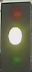

new_img


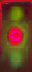

mask_img


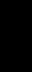

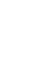

0.0
roi_img


new_img


mask_img


0.0
roi_img


new_img


mask_img


0.0
roi_img


new_img


mask_img


0.0
roi_img


new_img


mask_img


0.0
roi_img


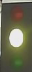

new_img


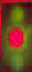

mask_img


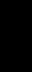

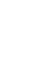

0.0


In [ ]:
yellow_img_path = "노란불/Images/"
for i, j in zip(yellow_images, yellow_detector):
  image_processing(yellow_img_path+i,j)

In [ ]:
def print2():
  print("hi")

In [ ]:
print2()

hi
